In [135]:
import numpy as np 
from matplotlib import pyplot as plt 
import seaborn as sns 
import pandas as pd 
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score 



### Load Data 

In [136]:
st = pd.read_csv(r'C:\Users\Sama Elshazly\Dropbox\python\student-mat.csv') #we read the data from file #panda library 
# df = pd.DataFrame(st)
columns = list(st.columns) #assign the feature in list #panda library 
print(columns)


['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']


### Explore Data

In [137]:
st.info()
print ("The number of NULL value in dataset :" ,st.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

##### The data is clean 

In [138]:
st.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


### Explor the third exam grade 

In [139]:
print (st['G3'].describe()) 

count    395.000000
mean      10.415190
std        4.581443
min        0.000000
25%        8.000000
50%       11.000000
75%       14.000000
max       20.000000
Name: G3, dtype: float64


### Data visualization

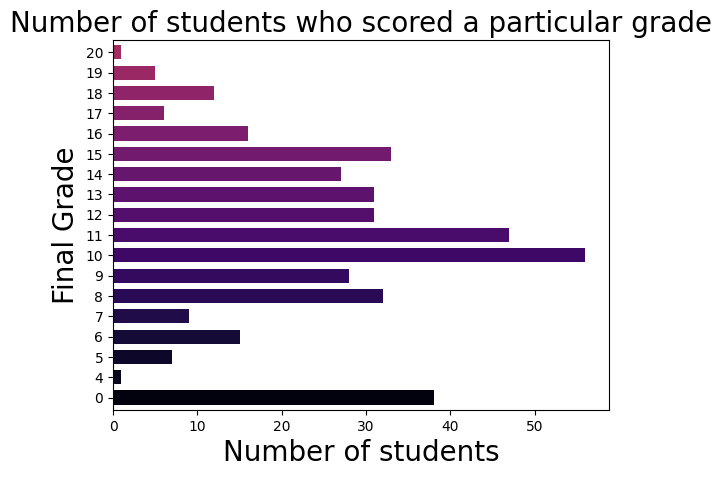

In [140]:
grade_counts = st['G3'].value_counts().sort_index().plot.barh( width=.7   ,    color=sns.color_palette('inferno',40)) 
grade_counts.set_title('Number of students who scored a particular grade',fontsize=20)
grade_counts.set_xlabel('Number of students', fontsize=20 )
grade_counts.set_ylabel('Final Grade', fontsize=20)
plt.show()

In [141]:
males = len(st[st['sex']=='M'])
female = len (st[st['sex']=='F'])
print("the number of males :",males)
print("the number of femals :",female)

the number of males : 187
the number of femals : 208


C:\Users\Sama Elshazly\AppData\Local\Temp\ipykernel_21956\1912227797.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='sex', y='G1', data=st, ci=None, ax=axs[0], palette=custom_colors)
C:\Users\Sama Elshazly\AppData\Local\Temp\ipykernel_21956\1912227797.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sex', y='G1', data=st, ci=None, ax=axs[0], palette=custom_colors)
C:\Users\Sama Elshazly\AppData\Local\Temp\ipykernel_21956\1912227797.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='sex', y='G2', data=st, ci=None, ax=axs[1], palette=custom_colors)
C:\Users\Sama Elshazly\AppData\Local\Temp\ipykernel_21956\1912227797.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and wil

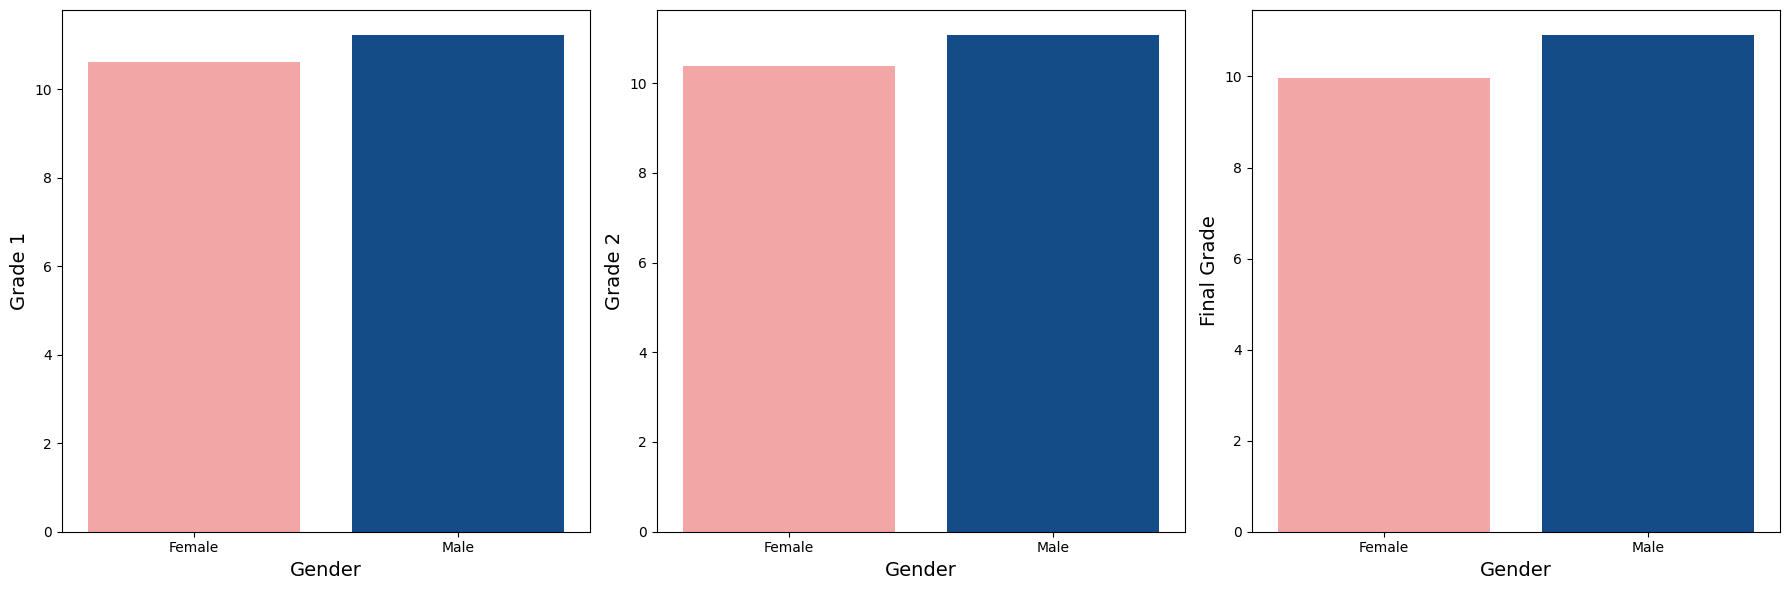

In [142]:
# Define custom colors
custom_colors = ['#ff9999', '#004c99']  # Darker blue color for the second bar, you can change these colors as desired

# Create a 1x3 grid of subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Plot for G1 with custom colors
sns.barplot(x='sex', y='G1', data=st, ci=None, ax=axs[0], palette=custom_colors)
axs[0].set_xlabel('Gender', fontsize=14)
axs[0].set_ylabel('Grade 1', fontsize=14)
axs[0].set_xticks([0, 1])
axs[0].set_xticklabels(["Female", "Male"])

# Plot for G2 with custom colors
sns.barplot(x='sex', y='G2', data=st, ci=None, ax=axs[1], palette=custom_colors)
axs[1].set_xlabel('Gender', fontsize=14)
axs[1].set_ylabel('Grade 2', fontsize=14)
axs[1].set_xticks([0, 1])
axs[1].set_xticklabels(["Female", "Male"])

# Plot for G3 with custom colors
sns.barplot(x='sex', y='G3', data=st, ci=None, ax=axs[2], palette=custom_colors)
axs[2].set_xlabel('Gender', fontsize=14)
axs[2].set_ylabel('Final Grade', fontsize=14)
axs[2].set_xticks([0, 1])
axs[2].set_xticklabels(["Female", "Male"])

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

Note: Males score slightly higher than the females and final grades.

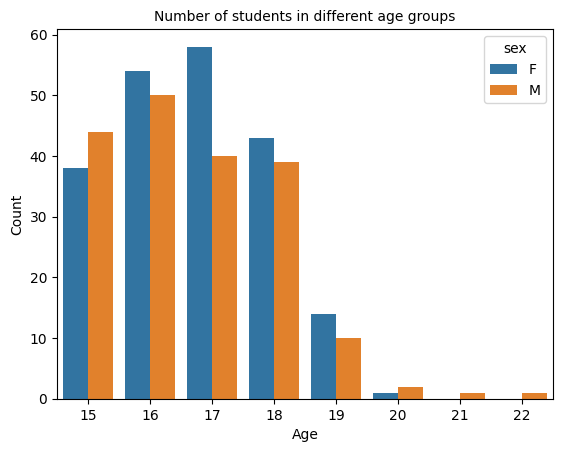

In [143]:
b = sns.countplot(x='age',hue='sex', data=st) #hue = tha discription for gragh 
b.axes.set_title('Number of students in different age groups',fontsize=10)
b.set_xlabel("Age",fontsize=10)
b.set_ylabel("Count",fontsize=10)
plt.show()

In [144]:

urban = len (st[st['address']== 'U'])
rural = len (st[st['address']=='R'])
print("the number of urban students :",urban) 
print("the number of rural students :",rural)

the number of urban students : 307
the number of rural students : 88


Note: The ages seem to be ranging from 15 to 19 and the most of the students are 16-year-old.



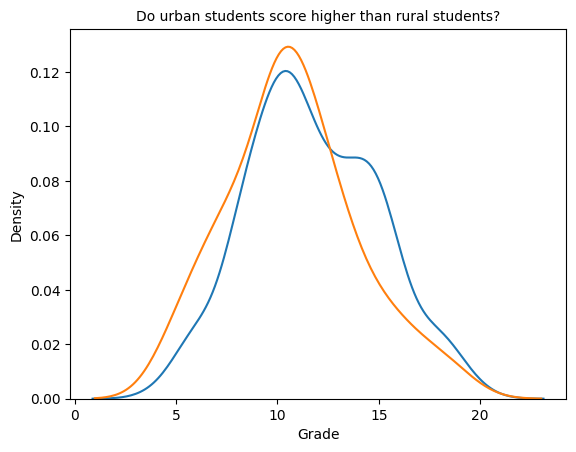

In [175]:
sns.kdeplot(st.loc[st['address'] == 'U', 'G3'], label='Urban')
sns.kdeplot(st.loc[st['address'] == 'R', 'G3'], label='Rural')
plt.title('Do urban students score higher than rural students?', fontsize = 10)
plt.xlabel('Grade', fontsize = 10)
plt.ylabel('Density', fontsize = 10)
plt.show()

Note: Here also students of Urban area got slightly higher grades than of Rural area.

C:\Users\Sama Elshazly\AppData\Local\Temp\ipykernel_21956\3502553650.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  b1 = sns.barplot(x=st['Medu'], y=st['G1'], data=st, ci=None, ax=axs[0])
C:\Users\Sama Elshazly\AppData\Local\Temp\ipykernel_21956\3502553650.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  b2 = sns.barplot(x=st['Medu'], y=st['G2'], data=st, ci=None, ax=axs[1])
C:\Users\Sama Elshazly\AppData\Local\Temp\ipykernel_21956\3502553650.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  b3 = sns.barplot(x=st['Medu'], y=st['G3'], data=st, ci=None, ax=axs[2])


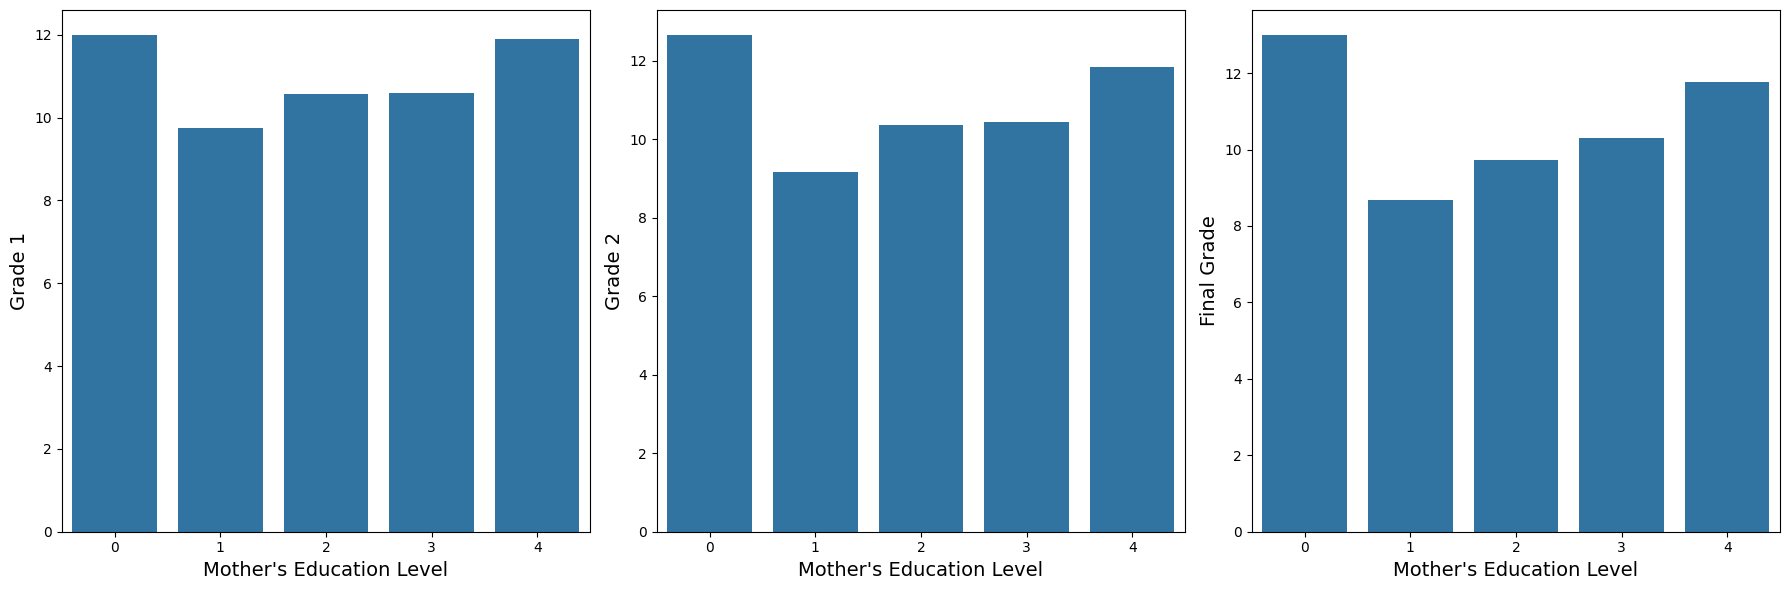

In [146]:
# Create a 1x3 grid of subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Grade 1 plot
b1 = sns.barplot(x=st['Medu'], y=st['G1'], data=st, ci=None, ax=axs[0])
b1.set_xlabel("Mother's Education Level", fontsize=14)
b1.set_ylabel('Grade 1', fontsize=14)

# Grade 2 plot
b2 = sns.barplot(x=st['Medu'], y=st['G2'], data=st, ci=None, ax=axs[1])
b2.set_xlabel("Mother's Education Level", fontsize=14)
b2.set_ylabel('Grade 2', fontsize=14)

# Final Grade plot
b3 = sns.barplot(x=st['Medu'], y=st['G3'], data=st, ci=None, ax=axs[2])
b3.set_xlabel("Mother's Education Level", fontsize=14)
b3.set_ylabel('Final Grade', fontsize=14)

# Adjust layout
plt.tight_layout()
# Show the plots
plt.show()

Medu: Mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education, or 4 – higher education)

Note:We can see that the students with uneducated mothers got better grades. We can think that they force and motivates their children into studying.

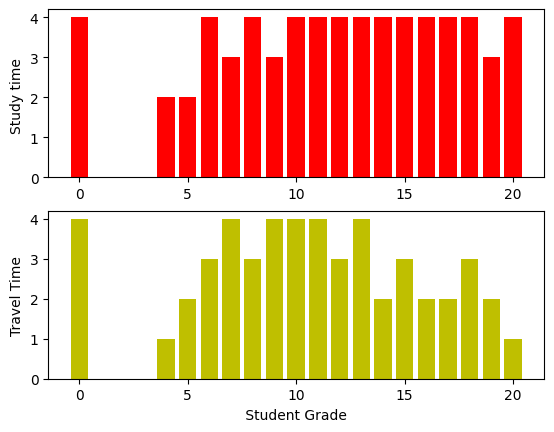

In [147]:
fig , ax = plt.subplots(2 , 1 , sharey= True)
ax[0].bar(st["G3"] , st["studytime"] ,  color ='r')
ax[1].bar(st["G3"] ,st["traveltime"] , color ='y')
ax[1].set_xlabel(' Student Grade ')
ax[0].set_ylabel('Study time ')
ax[1].set_ylabel('Travel Time')

plt.show()

### Data Peprocessing


In [148]:
st.drop(st[st['G3'] < 1].index, inplace = True)


##### Encoding categorical data

In [149]:
print ("The correlation between G3 and each feature : \n" , st.corr(numeric_only=True)['G3']) #to calculate the correlation between numeric values

The correlation between G3 and each feature : 
 age          -0.140372
Medu          0.190308
Fedu          0.158811
traveltime   -0.099785
studytime     0.126728
failures     -0.293831
famrel        0.037711
freetime     -0.021589
goout        -0.177383
Dalc         -0.140690
Walc         -0.190054
health       -0.081691
absences     -0.213129
G1            0.891805
G2            0.965583
G3            1.000000
Name: G3, dtype: float64


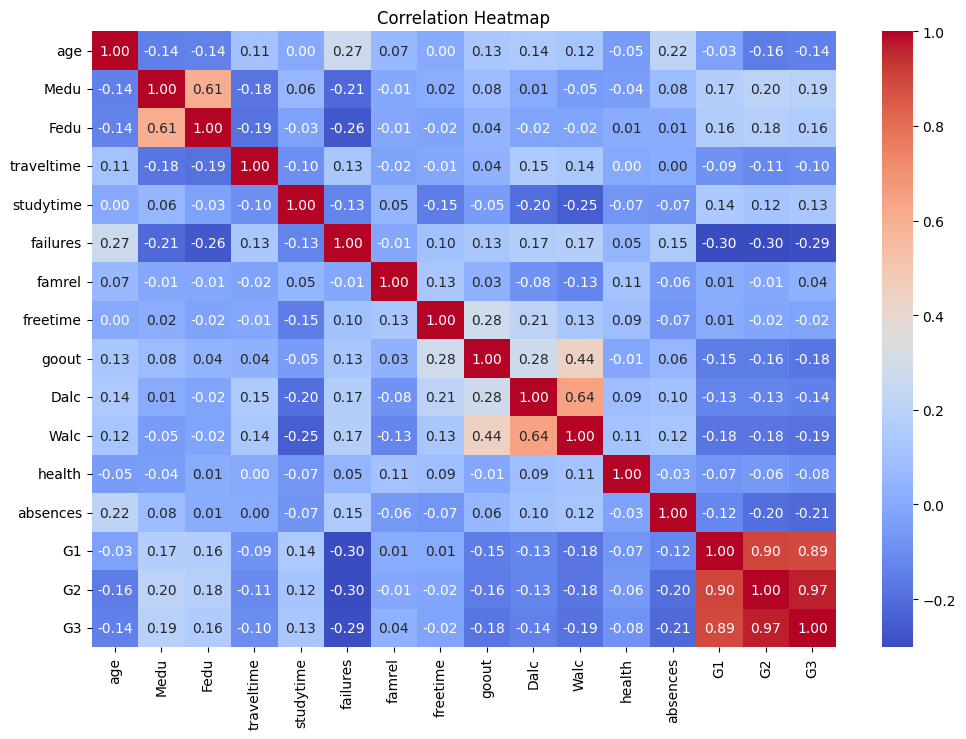

In [150]:
numeric_columns = st.select_dtypes(include=['number']).columns
plt.figure(figsize=(12, 8))
sns.heatmap(st[numeric_columns].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [151]:
category_st = st.select_dtypes(include = ['object'])
columns = list(category_st.columns) 
print(columns)


['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']


In [152]:
dummy_st = pd.get_dummies(category_st) #one_hot encoding 
dummy_st.head()

,school_GP,school_MS,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,True,False,True,False,False,True,True,False,True,False,...,True,False,False,True,False,True,True,False,True,False
1,True,False,True,False,False,True,True,False,False,True,...,True,False,True,False,False,True,False,True,True,False
2,True,False,True,False,False,True,False,True,False,True,...,True,False,False,True,False,True,False,True,True,False
3,True,False,True,False,False,True,True,False,False,True,...,False,True,False,True,False,True,False,True,False,True
4,True,False,True,False,False,True,True,False,False,True,...,True,False,False,True,False,True,True,False,True,False


In [153]:
dummy_st['G3'] = st['G3'] #back G3 to dataframe
dummy_st.head()

,school_GP,school_MS,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,...,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes,G3
0,True,False,True,False,False,True,True,False,True,False,...,False,False,True,False,True,True,False,True,False,6
1,True,False,True,False,False,True,True,False,False,True,...,False,True,False,False,True,False,True,True,False,6
2,True,False,True,False,False,True,False,True,False,True,...,False,False,True,False,True,False,True,True,False,10
3,True,False,True,False,False,True,True,False,False,True,...,True,False,True,False,True,False,True,False,True,15
4,True,False,True,False,False,True,True,False,False,True,...,False,False,True,False,True,True,False,True,False,10


##### Feature selection

In [154]:
dummy_st.corr()['G3'].sort_values().abs() #calculate correlation and sort it in ascending order


schoolsup_yes        0.238365
Mjob_other           0.142541
address_R            0.130090
higher_no            0.113419
internet_no          0.111624
sex_F                0.102448
Mjob_at_home         0.090624
school_MS            0.083615
Fjob_other           0.081502
guardian_other       0.069491
famsup_yes           0.067305
activities_no        0.058600
reason_course        0.050918
romantic_yes         0.049944
famsize_GT3          0.039744
paid_yes             0.028899
Pstatus_T            0.026665
nursery_no           0.026541
Fjob_services        0.018154
reason_other         0.003897
reason_home          0.000372
Fjob_health          0.006241
guardian_mother      0.007728
nursery_yes          0.026541
Pstatus_A            0.026665
paid_no              0.028899
Fjob_at_home         0.028954
guardian_father      0.035220
famsize_LE3          0.039744
Mjob_teacher         0.045390
romantic_no          0.049944
reason_reputation    0.056573
activities_yes       0.058600
famsup_no 


st = st.drop(['school','G1'] , axis='columns')
st.head()

Strong Connections:

Positive: When two things have a strong positive connection (like grades across periods), if one goes up, the other tends to go up too. Good grades in one period mean likely good grades in others.

Negative: For a strong negative connection (like failures and grades), if one goes up, the other goes down. More failures tend to mean lower grades.


## select the target

In [155]:
y = st['G3']

In [156]:
st.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [167]:
X = st[[ 'G1','failures' , 'Medu' ,'Walc' ,'absences' ,'studytime' ]]
X.head()

,G1,failures,Medu,Walc,absences,studytime
0,5,0,4,1,6,2
1,5,0,1,1,4,2
2,7,3,1,3,10,2
3,15,0,4,1,2,3
4,6,0,3,2,4,2


### Training Models

In [170]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)


In [171]:
X_train.shape , y_train.shape , X_test.shape , y_test.shape

((214, 6), (214,), (143, 6), (143,))

In [172]:
regression = LinearRegression()
regression.fit(X_train , y_train)

LinearRegression()

### Accuracy measurement

##### Score function

In [173]:
pred= regression.predict(X_test)
r2 = r2_score(y_test , pred) * 100
print(r2)


81.46088567468162


This method compares predicted values with the true values.